## **Cinco traços de personalidade** 

- Abertura à experiência (inventivo/curioso vs. consistente/cauteloso)
- Conscienciosidade (eficiente/organizado vs. descontraído/descuidado)
- Extroversão (extrovertida/energética vs. solitária/reservada)
- Amabilidade (amigável/compassivo vs. desafiador/desapegado)
- Neuroticismo (sensível/nervoso vs. seguro/confiante)

Link para saber mais sobre o projeto e base de dados: https://www.kaggle.com/tunguz/big-five-personality-test

# **Sobre**

Em um mundo cada vez mais conectado e digital, compreender a complexidade da personalidade humana é um desafio fascinante e essencial. A personalidade é uma construção multifacetada, moldada por uma variedade de fatores, desde a genética até as experiências de vida. Captar e analisar esses traços individuais é fundamental não apenas para psicólogos e profissionais de recursos humanos, mas também para o avanço da inteligência artificial e da aprendizagem de máquina.

Este projeto representa uma tentativa ambiciosa de explorar o vasto mundo da personalidade humana por meio do poder da tecnologia. Utilizando um conjunto de dados abrangente com mais de um milhão de registros, esta pesquisa busca responder a perguntas fundamentais sobre como as pessoas se expressam, interagem e revelam aspectos de sua personalidade em suas interações diárias. De acordo com essas informações, será criado um algoritmo de aprendizagem de máquina treinado, que enquadrará o indivíduo em um dos 5 traços de personalidades, conforme o modelo de cinco Fatores (MCF) desenvolvido por Ernest Tupes e Raymond Christal em 1961.

# **Sobre a base de dados**

Esses dados foram coletados (2016-2018) por meio de um teste de personalidade interativo on-line.
O teste de personalidade foi construído com os “Big-Five Factor Markers” do IPIP. https://ipip.ori.org/newBigFive5broadKey.htm
Os participantes foram informados de que suas respostas seriam registradas e utilizadas para pesquisa no início do teste, e solicitados a confirmar seu consentimento ao final do teste.

Os seguintes itens foram apresentados em uma página e cada um foi avaliado em uma escala de cinco pontos usando botões de opção. A ordem na página era EXT1, AGR1, CSN1, EST1, OPN1, EXT2, etc.

A escala foi rotulada como 1=Discordo, 3=Neutro, 5=Concordo

EXT1 Eu sou do tipo "a vida é uma festa".

EXT2 Eu não falo muito.

EXT3 Sinto-me confortável perto das pessoas.

EXT4 eu me mantenho em segundo plano.

EXT5 Eu inicio as conversas.

EXT6 Costumo ter pouco a dizer.

EXT7 Converso com muitas pessoas diferentes em festas.

EXT8 Não gosto de chamar atenção.

EXT9 Não me importo de ser o centro das atenções.

EXT10 Fico quieto perto de estranhos.

EST1 Fico estressado facilmente.

EST2 Estou relaxado a maior parte do tempo.

EST3 Sou muito preocupado.

EST4 Raramente me sinto triste.

EST5 Sou facilmente perturbado.

EST6 Eu fico chateado facilmente.

EST7 Mudo muito meu humor.

EST8 Tenho alterações de humor frequentes.

EST9 Eu fico irritado facilmente.

EST10 Muitas vezes me sinto triste.

AGR1 Sinto pouca preocupação pelos outros.

AGR2 Interesso-me por pessoas.

AGR3 Eu insulto as pessoas com frequencia.

AGR4 Simpatizo com os sentimentos dos outros.

AGR5 Não estou interessado nos problemas dos outros.

AGR6 Eu tenho um coração mole.

AGR7 Não estou realmente interessado nos outros.

AGR8 Reservo tempo para os outros.

AGR9 Sinto as emoções dos outros.

AGR10 Deixo as pessoas à vontade.

CSN1 Estou sempre preparado.

CSN2 Deixo meus pertences por aí.

CSN3 Presto atenção aos detalhes.

CSN4 Eu faço bagunça.

CSN5 Eu faço as tarefas na hora.

CSN6 Muitas vezes esqueço de colocar as coisas em seus devidos lugares.

CSN7 Gosto de ordem.

CSN8 Fujo dos meus deveres.

CSN9 Eu sigo um cronograma.

CSN10 Sou exigente no meu trabalho.

OPN1 Tenho um vocabulário rico.

OPN2 Tenho dificuldade em entender ideias abstratas.

OPN3 Tenho uma imaginação fértil.

OPN4 Não estou interessado em ideias abstratas.

OPN5 Tenho excelentes ideias.

OPN6 Não tenho boa imaginação.

OPN7 Sou rápido para entender as coisas.

OPN8 Eu uso palavras difíceis.

OPN9 Passo tempo refletindo sobre as coisas.

OPN10 Estou cheio de ideias.

In [1]:
#importando as bibliotecas e reduzindo o número máximo de colunas impressos na tela
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from io import open

In [2]:
#importando a base de dados
data = pd.read_csv('data-final.csv', sep='\t', usecols=range(0,50))

Para este projeto, analisando as questões através do dicionário de dados, e com a finalidade de otimização de processamento computacional, questões não relacionadas diretamente a personalidade do indivíduo foram descartadas. Utilizando somente as questões de 1 a 50

In [3]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [4]:
pd.options.display.float_format = "{:.2f}".format
data.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,...,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00
mean,2.65,2.77,3.29,3.14,3.28,2.40,2.77,3.41,2.96,3.56,...,3.65,2.08,4.00,2.00,3.79,1.89,3.98,3.18,4.12,3.96
std,1.26,1.32,1.22,1.24,1.28,1.23,1.40,1.27,1.35,1.31,...,1.16,1.11,1.10,1.09,0.99,1.10,1.01,1.26,1.04,1.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,...,3.00,1.00,3.00,1.00,3.00,1.00,3.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,...,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,...,5.00,3.00,5.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


data.max()

In [5]:
if (data.max() > 5).any():
    print("Maior que 5")
else:
	print("O valor máximo das notas é 5")

O valor máximo das notas é 5


In [6]:
data[(data == 0.00).all(axis=1)].describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,...,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Podemos verificar um problema nos dados, em alguns registros, temos o valor 0 como resposta, e as respostas das questões no questionário deveriam variam entre 1 e 5, por isso, será necessário remover os registros que possuem 0 como resposta para não afetar nosso modelo

In [7]:
#Utilizando no dataset apenas registros maiores que 0
data = data[(data > 0.00).all(axis=1)]

In [8]:
data.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,...,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00
mean,2.65,2.80,3.30,3.17,3.30,2.41,2.78,3.44,2.98,3.59,...,3.70,2.07,4.04,2.00,3.82,1.90,4.02,3.22,4.17,3.98
std,1.25,1.31,1.19,1.21,1.24,1.21,1.38,1.24,1.33,1.27,...,1.10,1.10,1.04,1.07,0.93,1.08,0.94,1.22,0.97,0.99
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,...,3.00,1.00,3.00,1.00,3.00,1.00,4.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,...,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,...,5.00,3.00,5.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


Os dados disponibilizados não possuem classe, de modo com que será necessário utilizar aprendizado de máquina não-supervisiondo.
Já que o objetivo do projeto é classificar traços de personalidade de indivíduos, será utilizado o modelo de classificação não supervisionado k-means para este projeto. 
A fim de entender melhor a viabilidade do projeto com estes dados, será utiliza uma técnica estatística elbow score, que visa identificar a quantidade de agrupamentos ideal de acordo com os dados disponibilizados.
O objetivo é fazer com que o modelo obtenha 5 agrumapentos, um para cada tipo de traço de personalidade, conforme o indicado na introdução do projeto.

# **Identificando o número ideal de clusters**

In [9]:
!pip install yellowbrick

In [10]:
#Importando as bibliotecas necessárias.
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [11]:
#Irei testar a quantidade de agrupamento ideal entre 2 e 10 grupos através de uma amostra aleatória de 5000 registros
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))

In [12]:
amostra_dados = data.sample(n=5000, random_state=1)

## Realizando o teste

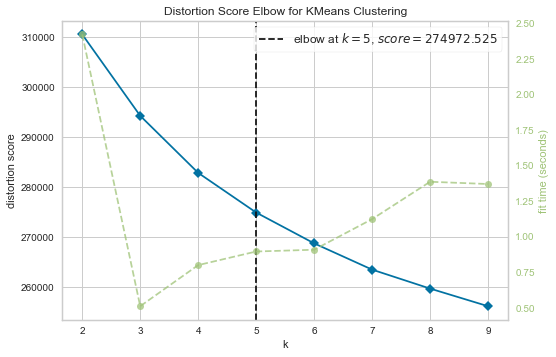

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
visualizer.fit(amostra_dados)
visualizer.poof()

Conforme visto no gráfico, a quantidade de cluster ideal para o modelo neste caso, é 5. Exatamente o valor que buscamos para o projeto

## **Agrupando os participantes em 5 grupos**
Atribuindo os registros aos devidos grupos

In [14]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(data)

Nesta etapa, será necessário inserindo os rótulos dos clusters no dataframe para identificarmos os clusters

In [15]:
predicoes = k_fit.labels_
data['clusters'] = predicoes

In [16]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,clusters
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,...,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,3
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,...,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,1
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,...,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,1
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,...,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,2
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,...,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,3


# **Rotulando os clusters**
nesta etapa, iremos realizar tencicas estatisticas para identificar as caracteristicas de cada cluster, e assim, conseguir rotulá-los

In [17]:
data.clusters.value_counts()

0    193796
1    182660
3    181522
4    171715
2    144741
Name: clusters, dtype: int64

In [18]:
data.groupby('clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
clusters,,,,,,,,,,,,,,,,,,,,,
0,3.45,1.92,3.79,2.51,4.05,1.82,3.66,2.77,3.77,3.01,...,3.78,2.10,4.27,1.95,3.97,1.76,3.99,3.40,4.22,4.21
1,2.14,3.28,3.13,3.64,3.00,2.69,2.24,3.99,2.34,4.12,...,3.56,2.16,3.87,2.08,3.71,2.00,4.00,2.95,4.25,3.78
2,2.16,3.44,2.80,3.58,2.62,2.86,2.13,3.70,2.71,3.98,...,3.73,1.95,3.80,2.05,3.80,2.05,4.09,3.32,3.91,3.85
3,3.48,1.94,4.34,2.21,4.28,1.66,3.90,2.80,3.77,2.51,...,3.91,1.75,4.10,1.79,4.17,1.66,4.33,3.26,4.11,4.30
4,1.80,3.64,2.24,4.07,2.30,3.19,1.74,4.09,2.17,4.49,...,3.52,2.38,4.07,2.12,3.43,2.09,3.69,3.18,4.29,3.72


Calculando a média de cada grupo de questões a fim de identificar padrões

In [19]:
#Selecionando as colunas de cada grupo.
col_list = list(data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

In [20]:
#Somando os valores de cada grupo.
data_soma = pd.DataFrame()
data_soma['extroversao'] = data[ext].sum(axis=1)/10
data_soma['neurotico'] = data[est].sum(axis=1)/10
data_soma['agradavel'] = data[agr].sum(axis=1)/10
data_soma['consciencioso'] = data[csn].sum(axis=1)/10
data_soma['aberto'] = data[opn].sum(axis=1)/10
data_soma['clusters'] = predicoes

In [21]:
#Exibindo a centroide
data_soma.groupby('clusters').mean()

,extroversao,neurotico,agradavel,consciencioso,aberto
clusters,,,,,
0,3.07,3.44,3.31,3.22,3.37
1,3.06,2.99,3.19,3.16,3.24
2,3.00,2.63,2.95,3.03,3.26
3,3.09,2.43,3.21,3.11,3.34
4,2.97,3.66,3.16,3.18,3.25


In [22]:
data_soma.groupby('clusters').median()

,extroversao,neurotico,agradavel,consciencioso,aberto
clusters,,,,,
0,3.10,3.40,3.30,3.20,3.40
1,3.00,3.00,3.20,3.20,3.20
2,3.00,2.60,2.90,3.00,3.30
3,3.10,2.40,3.20,3.10,3.40
4,3.00,3.70,3.20,3.20,3.30


# **Rotulando os clusters**

Será utilizado o critério da maior centroide de acordo com as questões agrupadas, para a nomeação de cada cluster, com base nos 5 traços de personalidade:

**Extroversão:** 0

**Neurotico:** 4

**Agradavel:** 2

**Consciencioso:** 1

**Aberto à experiencia:** 3

In [23]:
cluster_labels = {
    4: "Neuroticismo",
    2: "Agradabilidade",
    3: "Abertura",
    0: "Extroversão",
    1: "Conscienciosidade"
}

In [24]:
!pip install gradio

In [25]:
import gradio as gr


In [26]:
#Lendo os dados com as questões.
dicio_questoes = open("questoes.txt").read().split("\n")

In [27]:
dicio_questoes

['EXT1\tEu sou do tipo "a vida é uma festa".',
 'EXT2\tEu não falo muito.',
 'EXT3\tSinto-me confortável perto das pessoas.',
 'EXT4\tEu me mantenho em segundo plano.',
 'EXT5\tEu inicio conversas.',
 'EXT6\tCostumo ter pouco a dizer.',
 'EXT7\tConverso com muitas pessoas diferentes em festas.',
 'EXT8\tNão gosto de chamar atenção para mim.',
 'EXT9\tNão me importo de ser o centro das atenções.',
 'EXT10\tFico quieto perto de estranhos.',
 'EST1\tFico estressado facilmente.',
 'EST2\tEstou relaxado a maior parte do tempo.',
 'EST3\tEu me preocupo com as coisas.',
 'EST4\tRaramente me sinto triste.',
 'EST5\tSou facilmente perturbado.',
 'EST6\tEu fico chateado facilmente.',
 'EST7\tMudo muito meu humor.',
 'EST8\tTenho alterações de humor frequentes.',
 'EST9\tEu fico irritado facilmente.',
 'EST10\tMuitas vezes me sinto triste.',
 'AGR1\tSinto pouca preocupação pelos outros.',
 'AGR2\tInteresso-me por pessoas.',
 'AGR3\tEu insulto as pessoas.',
 'AGR4\tSimpatizo com os sentimentos dos

In [28]:
#Limpando os dados e recuperando apenas as questões
questions = []
for q in dicio_questoes:
    q = str(q)
    questions.append(q[q.find("\t"):].lstrip())

In [29]:
questions

['Eu sou do tipo "a vida é uma festa".',
 'Eu não falo muito.',
 'Sinto-me confortável perto das pessoas.',
 'Eu me mantenho em segundo plano.',
 'Eu inicio conversas.',
 'Costumo ter pouco a dizer.',
 'Converso com muitas pessoas diferentes em festas.',
 'Não gosto de chamar atenção para mim.',
 'Não me importo de ser o centro das atenções.',
 'Fico quieto perto de estranhos.',
 'Fico estressado facilmente.',
 'Estou relaxado a maior parte do tempo.',
 'Eu me preocupo com as coisas.',
 'Raramente me sinto triste.',
 'Sou facilmente perturbado.',
 'Eu fico chateado facilmente.',
 'Mudo muito meu humor.',
 'Tenho alterações de humor frequentes.',
 'Eu fico irritado facilmente.',
 'Muitas vezes me sinto triste.',
 'Sinto pouca preocupação pelos outros.',
 'Interesso-me por pessoas.',
 'Eu insulto as pessoas.',
 'Simpatizo com os sentimentos dos outros.',
 'Não estou interessado nos problemas dos outros.',
 'Eu tenho um coração mole.',
 'Não estou realmente interessado nos outros.',
 'Res

In [30]:
inputs_questoes = []
for q in questions:
    obj_input = gr.inputs.Slider(minimum=1,maximum=5,step=1,default=3,label=q)
    inputs_questoes.append(obj_input)

C:\Users\andre\anaconda3\lib\site-packages\gradio\inputs.py:90: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
C:\Users\andre\anaconda3\lib\site-packages\gradio\inputs.py:99: UserWarning: `optional` parameter is deprecated, and it has no effect
  optional=optional,


In [31]:
inputs_questoes

[slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider]

Criando a interface de predicao

In [32]:
def predict(*outputs_questions):
    outputs_questions = np.array(outputs_questions).reshape(1, -1)
    return k_fit.predict(outputs_questions)

iface = gr.Interface(
                    fn = predict,
                    title = "Cinco grandes personalidades",
                    description = "Sistema para detecção de traços de personalidade.",
                    inputs = inputs_questoes,
                    outputs="text")
iface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://ee75d7aecccf9546a0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [33]:
def predict(*outputs_questions):
    # Converter as respostas das perguntas em um array numpy
    outputs_questions = np.array(outputs_questions).reshape(1, -1)
    
    # Faz a previsão do cluster com base nas respostas
    cluster = k_fit.predict(outputs_questions)[0]
    
    # Obtém o rótulo descritivo correspondente ao cluster
    label = cluster_labels.get(cluster, "Rótulo Desconhecido")
    
    return label

# Substitua 'inputs_questoes' com a configuração correta dos inputs
# Substitua 'k_fit' pelo seu modelo treinado e 'cluster_labels' pelo seu mapeamento de clusters para rótulos.

iface = gr.Interface(
    fn=predict,
    title="Cinco grandes personalidades",
    description="Sistema para detecção de traços de personalidade.",
    inputs=inputs_questoes,
    outputs="text"
    
)

iface.launch(share=True)

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://1e45c896130235bba8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
